# Lab 6 Gene expression analysis on “GSE3500” Gene expression patterns in human liver cancers
- Name: AbdelRahman Adel AbdelFattah
- ID: 17012296

## Objective

- Understand and perform the preprocessing of microarray data.
- Conduct principal component analysis (PCA) to explore data.
- Apply regression analysis to investigate specific gene expressions.
- Perform clustering to identify patterns in gene expression data.
- Utilize classification techniques to distinguish between cancer and non-cancer samples.

## Prerequisites

- Software: R and RStudio.
- R Packages: affy, limma, ggplot2, cluster, fpc, e1071, class, GEOquery.
- Data: GSE3500 from the Gene Expression Omnibus (GEO).

In [ ]:
shell_call <- function(command, ...) {
    result <- system(command, intern = TRUE, ...)
    cat(paste0(result, collapse = "\n"))
}

In [ ]:
# install.packages("BiocManager")
# BiocManager::install()
# BiocManager::install("affy")
# BiocManager::install("limma")
# install.packages("gridExtra")
# install.packages("class")
# install.packages("ggplot2")
# install.packages("cluster")
# install.packages("fpc")
# install.packages("e1071")
# install.packages("class")
# BiocManager::install("GEOquery")
# BiocManager::install("EDASeq")
# install.packages("MASS")
# install.packages("caret")
BiocManager::install("oligo")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'oligo'

also installing the dependencies ‘oligoClasses’, ‘affxparser’, ‘ff’


Old packages: 'bit', 'bslib', 'cpp11', 'curl', 'data.table', 'devtools',
  'fansi', 'gargle', 'gert', 'haven', 'highr', 'isoband', 'jsonlite',
  'openssl', 'progress', 'ragg', 'roxygen2', 'sass', 'scales', 'svglite',
  'testthat', 'textshaping', 'vctrs', 'vroom', 'whisker', 'xml2', 'boot',
  'cluster', 'Matrix', 'nlme', 'rpart'



In [ ]:
library(affy)
library(limma)
library(ggplot2)
library(cluster)
library(fpc)
library(e1071)
library(class)
library(GEOquery)
library(EDASeq)
library(gridExtra)
library(MASS)
library(caret)
library(oligo)

## Part 1: Data Acquisition

Access and download the dataset from GEO.

Hints: Usage of getGEO() function from the GEOquery package. Example: gse <- getGEO("GSE3500", GSEMatrix = TRUE)

In [ ]:
all_gse <- getGEO("GSE3500", GSEMatrix = TRUE)

Found 13 file(s)

GSE3500-GPL2648_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpPajp4o/GSE3500-GPL2648_series_matrix.txt.gz

Using locally cached version of GPL2648 found here:
/tmp/RtmpPajp4o/GPL2648.soft.gz 

GSE3500-GPL2649_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpPajp4o/GSE3500-GPL2649_series_matrix.txt.gz

Using locally cached version of GPL2649 found here:
/tmp/RtmpPajp4o/GPL2649.soft.gz 

GSE3500-GPL2831_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpPajp4o/GSE3500-GPL2831_series_matrix.txt.gz

Using locally cached version of GPL2831 found here:
/tmp/RtmpPajp4o/GPL2831.soft.gz 

GSE3500-GPL2868_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpPajp4o/GSE3500-GPL2868_series_matrix.txt.gz

Using locally cached version of GPL2868 found here:
/tmp/RtmpPajp4o/GPL2868.soft.gz 

GSE3500-GPL2906_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpPajp4o/GSE3500-GPL2906_series_matrix.txt.gz

Using locally cached version

In [ ]:
show(all_gse)

$`GSE3500-GPL2648_series_matrix.txt.gz`
ExpressionSet (storageMode: lockedEnvironment)
assayData: 24192 features, 22 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM79795 GSM79796 ... GSM79982 (22 total)
  varLabels: title geo_accession ... data_row_count (36 total)
  varMetadata: labelDescription
featureData
  featureNames: 1 2 ... 24192 (24192 total)
  fvarLabels: ID METACOLUMN ... GB_LIST (10 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 12058060
15154008 
Annotation: GPL2648 

$`GSE3500-GPL2649_series_matrix.txt.gz`
ExpressionSet (storageMode: lockedEnvironment)
assayData: 24192 features, 5 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM79785 GSM79818 ... GSM79989 (5 total)
  varLabels: title geo_accession ... data_row_count (36 total)
  varMetadata: labelDescription
featureData
  featureNames: 1 2 ... 24192 (24192 total)
  fvarLabels: ID METACOLUM

In [ ]:
gse <- as.data.frame(all_gse[[1]])
for(i in seq(all_gse)){
  tmp <- as.data.frame(all_gse[[i]])
  if(i != 1 && ncol(gse)==ncol(tmp) ){
    gse <- rbind(gse, tmp)
  }
}
gse

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,contact_department,contact_institute,contact_address,contact_city,contact_state,contact_zip.postal_code,contact_country,contact_web_link,supplementary_file,data_row_count
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM79795,-0.218,1.338,-0.141,0.708,0.735,0.127,-0.387,-1.171,-0.279,0.864,⋯,"Stanford University, School of Medicine",Stanford Microarray Database (SMD),300 Pasteur Drive,Stanford,CA,94305,USA,http://genome-www5.stanford.edu/,NONE,24192
GSM79796,1.561,1.628,1.725,0.682,0.714,0.070,0.763,-0.988,0.567,0.760,⋯,"Stanford University, School of Medicine",Stanford Microarray Database (SMD),300 Pasteur Drive,Stanford,CA,94305,USA,http://genome-www5.stanford.edu/,NONE,24192
GSM79797,0.644,1.247,0.772,0.204,0.098,-0.262,0.438,-0.315,-0.273,1.251,⋯,"Stanford University, School of Medicine",Stanford Microarray Database (SMD),300 Pasteur Drive,Stanford,CA,94305,USA,http://genome-www5.stanford.edu/,NONE,24192
GSM79798,4.033,3.940,2.435,1.087,0.744,-0.079,3.590,-2.411,-0.567,2.249,⋯,"Stanford University, School of Medicine",Stanford Microarray Database (SMD),300 Pasteur Drive,Stanford,CA,94305,USA,http://genome-www5.stanford.edu/,NONE,24192
GSM79814,3.750,3.478,1.973,0.833,0.902,1.743,3.519,-0.706,0.278,1.864,⋯,"Stanford University, School of Medicine",Stanford Microarray Database (SMD),300 Pasteur Drive,Stanford,CA,94305,USA,http://genome-www5.stanford.edu/,NONE,24192
GSM79821,-0.014,0.537,-0.293,0.069,0.141,-0.013,-0.198,0.277,-0.156,0.713,⋯,"Stanford University, School of Medicine",Stanford Microarray Database (SMD),300 Pasteur Drive,Stanford,CA,94305,USA,http://genome-www5.stanford.edu/,NONE,24192
GSM79853,0.383,0.916,0.475,2.692,-0.238,0.131,0.504,-0.677,-1.828,2.054,⋯,"Stanford University, School of Medicine",Stanford Microarray Database (SMD),300 Pasteur Drive,Stanford,CA,94305,USA,http://genome-www5.stanford.edu/,NONE,24192
GSM79904,3.393,3.196,2.631,1.589,1.004,-0.247,3.829,-2.191,-0.709,2.070,⋯,"Stanford University, School of Medicine",Stanford Microarray Database (SMD),300 Pasteur Drive,Stanford,CA,94305,USA,http://genome-www5.stanford.edu/,NONE,24192
GSM79905,3.837,3.228,2.204,1.600,0.866,0.941,2.770,-0.218,0.143,2.444,⋯,"Stanford University, School of Medicine",Stanford Microarray Database (SMD),300 Pasteur Drive,Stanford,CA,94305,USA,http://genome-www5.stanford.edu/,NONE,24192


In [ ]:
raw_dataset <- gse[,1:24192]
raw_dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X24183,X24184,X24185,X24186,X24187,X24188,X24189,X24190,X24191,X24192
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM79795,-0.218,1.338,-0.141,0.708,0.735,0.127,-0.387,-1.171,-0.279,0.864,⋯,-0.951,NA,NA,1.107,NA,1.786,NA,NA,-1.045,NA
GSM79796,1.561,1.628,1.725,0.682,0.714,0.070,0.763,-0.988,0.567,0.760,⋯,3.556,2.071,0.749,NA,NA,2.071,NA,3.556,0.334,0.486
GSM79797,0.644,1.247,0.772,0.204,0.098,-0.262,0.438,-0.315,-0.273,1.251,⋯,NA,NA,NA,1.434,NA,1.849,NA,0.434,NA,5.267
GSM79798,4.033,3.940,2.435,1.087,0.744,-0.079,3.590,-2.411,-0.567,2.249,⋯,0.707,1.560,NA,NA,NA,2.029,2.088,NA,NA,NA
GSM79814,3.750,3.478,1.973,0.833,0.902,1.743,3.519,-0.706,0.278,1.864,⋯,NA,-0.387,2.935,NA,3.198,NA,NA,NA,NA,2.683
GSM79821,-0.014,0.537,-0.293,0.069,0.141,-0.013,-0.198,0.277,-0.156,0.713,⋯,NA,NA,NA,NA,NA,NA,1.150,NA,-1.850,-1.265
GSM79853,0.383,0.916,0.475,2.692,-0.238,0.131,0.504,-0.677,-1.828,2.054,⋯,-0.008,0.670,1.255,NA,1.255,-0.330,0.255,NA,NA,0.407
GSM79904,3.393,3.196,2.631,1.589,1.004,-0.247,3.829,-2.191,-0.709,2.070,⋯,NA,0.346,2.083,3.468,2.849,NA,2.484,2.247,4.516,NA
GSM79905,3.837,3.228,2.204,1.600,0.866,0.941,2.770,-0.218,0.143,2.444,⋯,NA,2.851,2.851,1.629,0.629,NA,NA,NA,NA,3.459


## Part 2: Preprocessing and Quality Control

Perform initial data checks and normalization.

Hints: to plot QC metrics like RLE plots using the plotRLE() function. Normalization steps using the rma() function from the affy package.


In [ ]:
dataset <- na.omit(t(raw_dataset))
dim(dataset)

[1] 1056  206

In [ ]:
scaled <- scale(dataset)
scaled

,GSM79795,GSM79796,GSM79797,GSM79798,GSM79814,GSM79821,GSM79853,GSM79904,GSM79905,GSM79906,⋯,GSM79894,GSM79895,GSM79907,GSM79909,GSM79910,GSM79911,GSM79921,GSM79935,GSM79940,GSM79979
X14,0.81981568,0.43842626,0.168058016,0.82626894,-0.04396822,0.5415288,0.44359444,-0.22299655,0.03128759,0.420540735,⋯,-1.49566572,-1.56352421,-1.38574656,-1.19445901,-1.403818669,-1.33917603,-1.21812283,-0.43219739,-1.12855693,-1.34431271
X17,2.32843627,1.30556973,0.318680999,2.55149458,1.41395727,0.4811197,0.34684437,1.03577017,1.79080735,1.457150024,⋯,-1.38677869,-1.73322947,-1.22537616,-0.20624985,-0.612225776,-0.94088644,-1.23854345,-0.37997144,-0.68932128,-0.89599385
X37,0.95537587,0.70523964,0.084104223,0.95790972,1.57386326,0.9624442,0.75865237,0.46125612,0.70982151,0.575411186,⋯,2.83746131,2.67844956,2.45473930,1.17578051,1.408247487,2.38981033,2.74756149,3.52195100,1.82081764,3.48889227
X67,0.19644421,0.03020179,0.312919464,0.66683732,0.61720829,-0.3295321,0.10703650,0.15048368,0.56735353,0.543268262,⋯,-0.28853398,-0.37887624,-0.43823063,-0.20938370,-0.250461297,-0.17275650,-0.44554272,0.14729604,-0.16192919,-0.12819195
X70,-0.17223842,0.48022702,-0.011372640,0.08030448,-0.21986481,-0.3392755,-0.14765599,-0.36501126,0.36934719,0.292699562,⋯,-0.08085540,-0.07498542,-0.13639813,-0.48516300,-0.300809961,-0.21400792,-0.27605158,0.05429093,-0.25936526,0.06766828
X76,2.12612295,2.09800546,0.545850086,1.54444256,1.38336656,2.1345765,2.71928842,1.43322691,1.79805148,1.144487039,⋯,0.73760012,0.91101530,1.07023154,-1.50157686,-0.289621369,-0.12937138,0.13168012,2.08466421,0.37396923,-0.07755128
X78,-1.08624272,0.21697116,0.371357888,-0.62982443,-0.48822878,-0.1142027,0.02930567,-0.47843859,-0.55146278,-0.597805528,⋯,-0.05056894,-0.09669191,-0.27435869,-0.52485851,-0.660709675,-0.54970915,-0.57555400,-0.05159183,-0.81768945,-0.61225716
X161,0.02596700,0.61452309,0.457780911,0.52715182,1.53006292,0.1381516,1.14151803,1.25524744,0.95773189,1.061938167,⋯,0.62943419,0.96166377,1.34545235,1.63436806,1.521065791,1.37132693,0.87567136,0.99292720,0.44433973,0.85259865
X167,-0.48957250,0.45621382,-0.187510991,0.28727305,-0.23933163,-0.3840952,0.88103707,-0.12063530,-0.26491702,0.085962121,⋯,0.48449185,0.52095631,-0.25404978,0.11026958,0.532740153,-0.11016813,-0.30123701,0.04713669,-0.36453436,-0.14234155
X169,-0.85209331,0.47489075,0.131019578,0.09785659,0.42393061,-0.9618795,0.31045973,-0.46645034,-0.69071114,0.324842485,⋯,-0.26906411,-0.29665470,-0.72745759,-1.21744061,-1.265826033,-0.90674733,-0.68650603,-0.42790484,-0.84784823,-0.80439382


Warning message in log(x + 1):
“NaNs produced”


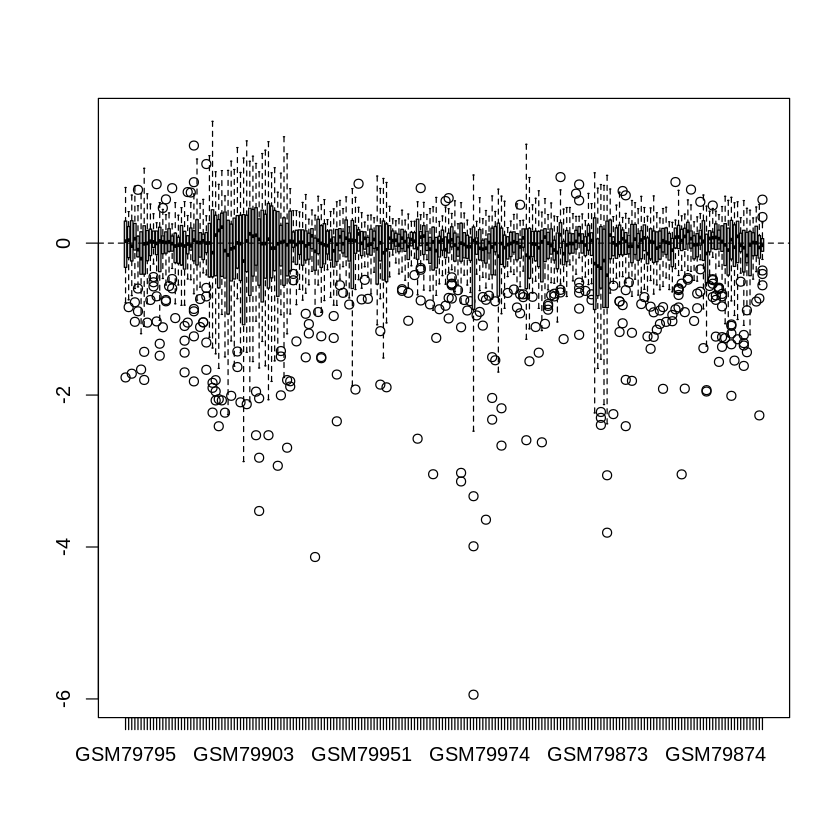

In [ ]:
plotRLE(scaled)

In [ ]:
dataset <- scaled

## Part 3: Principal Component Analysis (PCA)

### Task 3.1: Compute PCA and View Eigenvalues and Eigenvectors

Load the PCA results into R and create a 2D plot of the first two principal components.

Hints: You can use the ggplot2 package for this task. Example: ggplot(data, aes(x=PC1, y=PC2)) + geom_point().


In [ ]:
pca <- prcomp(t(dataset))
summary(pca)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     12.7574 6.21176 4.91855 4.68871 4.58205 3.65103 3.42584
Proportion of Variance  0.2988 0.07085 0.04442 0.04036 0.03855 0.02447 0.02155
Cumulative Proportion   0.2988 0.36967 0.41409 0.45445 0.49300 0.51748 0.53902
                           PC8     PC9    PC10   PC11    PC12   PC13   PC14
Standard deviation     3.32272 3.24281 3.07627 2.8298 2.77653 2.6198 2.5565
Proportion of Variance 0.02027 0.01931 0.01738 0.0147 0.01415 0.0126 0.0120
Cumulative Proportion  0.55930 0.57860 0.59598 0.6107 0.62484 0.6374 0.6494
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.40436 2.26376 2.21175 2.16546 2.12890 2.07001 2.03104
Proportion of Variance 0.01061 0.00941 0.00898 0.00861 0.00832 0.00787 0.00757
Cumulative Proportion  0.66005 0.66946 0.67844 0.68705 0.69537 0.70324 0.71081
                          PC22    PC23

In [ ]:
pca_scores <- pca$x
dataset <- cbind(t(dataset), PC1 = pca_scores[, 1], PC2 = pca_scores[, 2], PC3 = pca_scores[,3])

In [ ]:
dataset

,X14,X17,X37,X67,X70,X76,X78,X161,X167,X169,⋯,X23982,X23985,X23989,X24110,X24128,X24137,X24138,PC1,PC2,PC3
GSM79795,0.81981568,2.3284363,0.95537587,0.19644421,-0.17223842,2.12612295,-1.08624272,0.0259670,-0.489572501,-0.852093308,⋯,1.32816639,1.04266842,-0.1804542,1.24087384,0.62777208,0.4439443,-0.01100396,-7.1939670,-18.148281099,7.0773629
GSM79796,0.43842626,1.3055697,0.70523964,0.03020179,0.48022702,2.09800546,0.21697116,0.6145231,0.456213817,0.474890754,⋯,-0.85117173,1.71913047,-1.4861876,1.02719444,0.62608500,1.8196302,1.69333851,2.1786079,-6.033388222,-5.3170518
GSM79797,0.16805802,0.3186810,0.08410422,0.31291946,-0.01137264,0.54585009,0.37135789,0.4577809,-0.187510991,0.131019578,⋯,-1.09124888,0.90306525,-1.6032024,0.85697297,0.27670410,1.1401113,1.47263412,1.7547583,-7.723275546,-5.7776244
GSM79798,0.82626894,2.5514946,0.95790972,0.66683732,0.08030448,1.54444256,-0.62982443,0.5271518,0.287273051,0.097856586,⋯,-0.78633070,2.97201376,-0.7168536,1.01276005,0.36260083,2.4198538,0.07006575,4.3581912,-3.280012492,5.3153648
GSM79814,-0.04396822,1.4139573,1.57386326,0.61720829,-0.21986481,1.38336656,-0.48822878,1.5300629,-0.239331628,0.423930612,⋯,-0.72739252,2.24268745,-0.7322592,0.38013028,0.37317784,3.1722279,0.80561926,2.6936683,-1.154999862,-0.1435686
GSM79821,0.54152883,0.4811197,0.96244419,-0.32953213,-0.33927554,2.13457654,-0.11420274,0.1381516,-0.384095231,-0.961879511,⋯,-0.21358554,1.00921256,-0.1863040,2.25734352,0.35445533,-0.6617824,0.49865782,-6.3204038,-16.378420784,0.3451770
GSM79853,0.44359444,0.3468444,0.75865237,0.10703650,-0.14765599,2.71928842,0.02930567,1.1415180,0.881037071,0.310459728,⋯,-0.91007963,2.31657659,-0.5313486,0.83638319,0.14259422,0.5816907,-0.17907909,-7.4350659,-11.362862082,-3.5190564
GSM79904,-0.22299655,1.0357702,0.46125612,0.15048368,-0.36501126,1.43322691,-0.47843859,1.2552474,-0.120635304,-0.466450337,⋯,-0.70068239,1.99851922,-0.4655282,0.67427819,0.36073922,2.8496853,1.45443690,2.7941631,-4.979888286,-6.7459158
GSM79905,0.03128759,1.7908073,0.70982151,0.56735353,0.36934719,1.79805148,-0.55146278,0.9577319,-0.264917020,-0.690711143,⋯,-0.93379210,2.75749684,-0.7542985,0.06428864,0.89414449,3.2814892,1.47769976,5.0495492,-3.762433591,-1.9267592
GSM79906,0.42054074,1.4571500,0.57541119,0.54326826,0.29269956,1.14448704,-0.59780553,1.0619382,0.085962121,0.324842485,⋯,-0.67304919,2.66177914,-1.3612000,0.47386877,0.12321869,2.9817473,0.50382013,5.3443314,-1.232525175,0.6252431


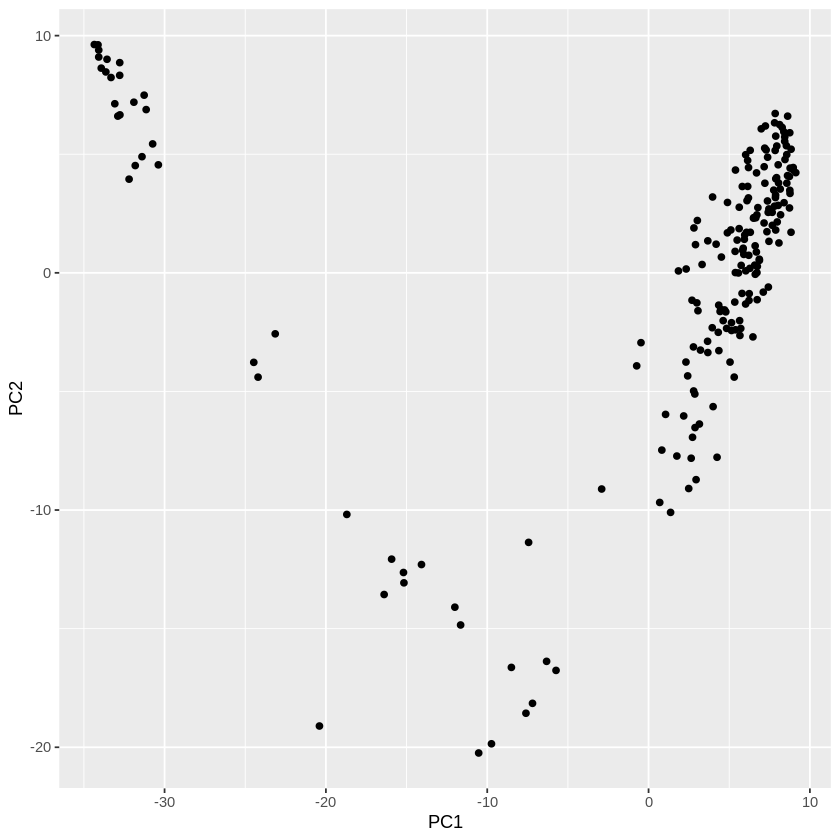

In [ ]:
df <- as.data.frame(dataset)
ggplot(df, aes(x=PC1, y=PC2)) + geom_point()

### Task 3.2: Plotting PC1 vs PC2, PC1 vs PC3, and PC2 vs PC3

Create plots comparing PC1 vs PC2, PC1 vs PC3, and PC2 vs PC3.

Hints: You can use the gridExtra package to arrange multiple plots on a single page.

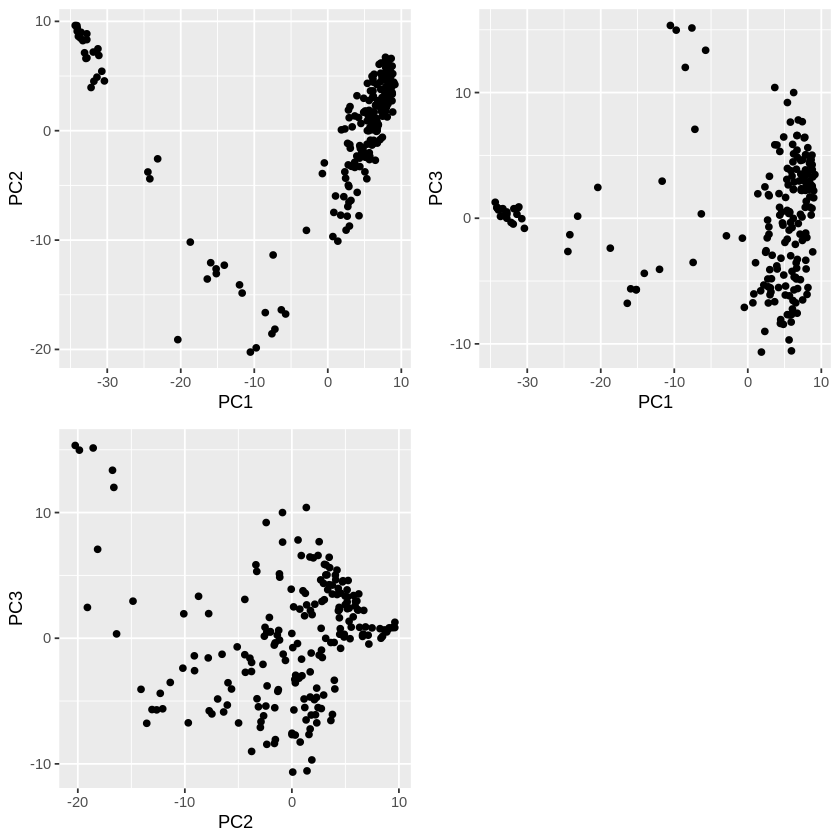

In [ ]:
plot_pc1_pc2 <- ggplot(df, aes(x=PC1, y=PC2)) + geom_point()
plot_pc1_pc3 <- ggplot(df, aes(x=PC1, y=PC3)) + geom_point()
plot_pc2_pc3 <- ggplot(df, aes(x=PC2, y=PC3)) + geom_point()
grid.arrange(plot_pc1_pc2, plot_pc1_pc3, plot_pc2_pc3, ncol = 2)

## Part 4: Regression Analysis

Investigate relationships between PC1, PC2 and PC3 and cancer existence.

Hints: You can create a logistic regression model using the glm() function. Make sure to set family = binomial for logistic regression.


In [ ]:
gse_df <-as.data.frame(gse)
cancer_description <- gse_df[, "description"]
cancer_keywords <- unique(gse_df[, "description"])
cancer_keywords

[1] "Simple annotation: Metastatic tumor, Liver"
[2] "Simple annotation: Primary tumor, Liver"   
[3] "Simple annotation: Non-tumor tissue, Liver"
[4] "Simple annotation: Cell-line, Liver"       
[5] "Simple annotation: Adenoma, Liver"         
[6] "Simple annotation: FNH, Liver"

In [ ]:
desc_clustering <- c()
for(desc in cancer_description){
  for(i in seq(cancer_keywords)){
    if(desc == cancer_keywords[i]){
      desc_clustering <- append(desc_clustering, i)
    }
  }
}
length(desc_clustering)

[1] 206

In [ ]:
cancer_existence <- c()
for(desc in cancer_description){
  if(desc == cancer_keywords[1] || desc == cancer_keywords[2]){
    cancer_existence <- append(cancer_existence, 1)
  }else{
    cancer_existence <- append(cancer_existence, 0)
  }
}
length(cancer_existence)

[1] 206

In [ ]:
top_3_pca <- data.frame(
  PC1 = pca_scores[, 1],
  PC2 = pca_scores[, 2],
  PC3 = pca_scores[, 3]
)
data_for_regression <- top_3_pca
data_for_regression$CancerExistence <- cancer_existence

In [ ]:
data_for_regression

,PC1,PC2,PC3,CancerExistence
,<dbl>,<dbl>,<dbl>,<dbl>
GSM79795,-7.1939670,-18.148281099,7.0773629,1
GSM79796,2.1786079,-6.033388222,-5.3170518,1
GSM79797,1.7547583,-7.723275546,-5.7776244,1
GSM79798,4.3581912,-3.280012492,5.3153648,0
GSM79814,2.6936683,-1.154999862,-0.1435686,0
GSM79821,-6.3204038,-16.378420784,0.3451770,1
GSM79853,-7.4350659,-11.362862082,-3.5190564,1
GSM79904,2.7941631,-4.979888286,-6.7459158,1
GSM79905,5.0495492,-3.762433591,-1.9267592,1


In [ ]:
logistic_model <- glm(CancerExistence ~ PC1 + PC2 + PC3, data = data_for_regression, family = binomial)
logistic_model


Call:  glm(formula = CancerExistence ~ PC1 + PC2 + PC3, family = binomial, 
    data = data_for_regression)

Coefficients:
(Intercept)          PC1          PC2          PC3  
    0.37532     -0.01359     -0.13461     -0.24182  

Degrees of Freedom: 205 Total (i.e. Null);  202 Residual
Null Deviance:	    283.2 
Residual Deviance: 213.7 	AIC: 221.7

## Part 5: Clustering Analysis

### Task 5.1: clustering using K-means, Single Linkage, and DBSCAN.

Explore data grouping based on gene expression PC1,PC2,PC3 using K-means, Single Linkage, and DBSCAN.

Produce at least 2 results from each cluster method by varying hyperparameters of each methodSingle Linkage Hierarchical Clustering:

Hints:

you can use below as guidance but you are encouraged to choose different hyperparameters of your choice

K-means Method 1 - K-means with K=3.

K-means Method 2 - K-means with K=4.

Single Linkage Method 1 - Single Linkage with Low Threshold.

Single Linkage Method 2 - Single Linkage with High Threshold.

DBSCANMethod 1 - DBSCAN with ε=0.1 and MinPts=5.

DBSCAN Method 2 - DBSCAN with ε=0.2 and MinPts=10.


In [ ]:
k_3_means_clusters <- kmeans(top_3_pca, centers = 3)
summary(k_3_means_clusters)

             Length Class  Mode   
cluster      206    -none- numeric
centers        9    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [ ]:
k_4_means_clusters <- kmeans(top_3_pca, centers = 4)
summary(k_4_means_clusters)

             Length Class  Mode   
cluster      206    -none- numeric
centers       12    -none- numeric
totss          1    -none- numeric
withinss       4    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           4    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [ ]:
hierarchical_clusters <- hclust(dist(top_3_pca))
summary(hierarchical_clusters)

            Length Class  Mode     
merge       410    -none- numeric  
height      205    -none- numeric  
order       206    -none- numeric  
labels      206    -none- character
method        1    -none- character
call          2    -none- call     
dist.method   1    -none- character

In [ ]:
single_linkage_clusters_low <- cutree(hierarchical_clusters, h = 5)
summary(single_linkage_clusters_low)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      13      20      19      26      36 

In [ ]:
single_linkage_clusters_high <- cutree(hierarchical_clusters, h = 25)
summary(single_linkage_clusters_high)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    2.00    2.16    2.00    4.00 

In [ ]:
dbscan_clusters_1 <- dbscan(top_3_pca, eps = 0.1, MinPts = 5)
summary(dbscan_clusters_1)

        Length Class  Mode   
cluster 206    -none- numeric
eps       1    -none- numeric
MinPts    1    -none- numeric

In [ ]:
dbscan_clusters_2 <- dbscan(top_3_pca, eps =0.2, MinPts = 10)
summary(dbscan_clusters_2)

        Length Class  Mode   
cluster 206    -none- numeric
eps       1    -none- numeric
MinPts    1    -none- numeric

### Task 5.2: Visualize clusters

Visualize cluster output in PC1 vs PC2 for each method, and choose the best and worst cluster output from your visualization.

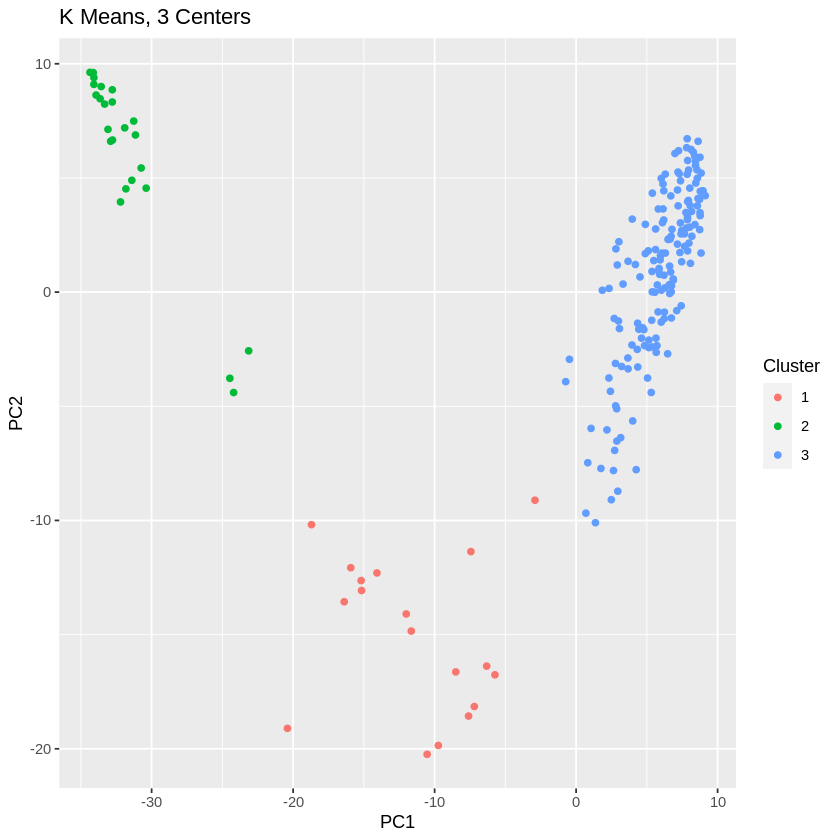

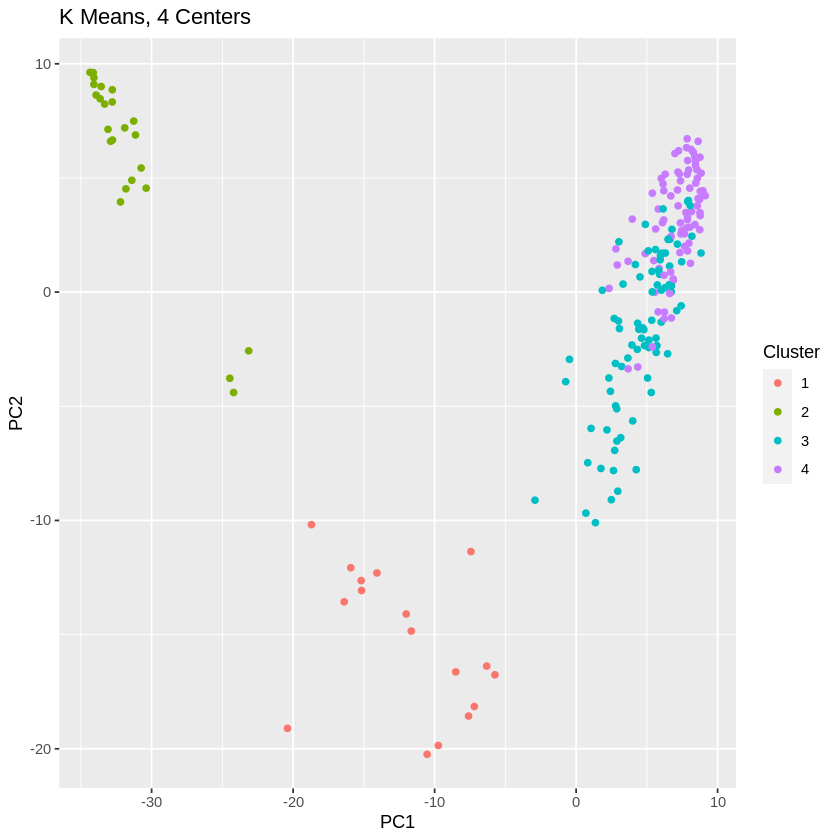

In [ ]:
k_3_means_clusters_factor <- as.factor(k_3_means_clusters$cluster)
k_4_means_clusters_factor <- as.factor(k_4_means_clusters$cluster)

ggplot(as.data.frame(top_3_pca), aes(x = PC1, y = PC2, color = k_3_means_clusters_factor)) + geom_point() +labs(title = "K Means, 3 Centers", color = "Cluster")
ggplot(as.data.frame(top_3_pca), aes(x = PC1, y = PC2, color = k_4_means_clusters_factor)) + geom_point() + labs(title = "K Means, 4 Centers", color = "Cluster")

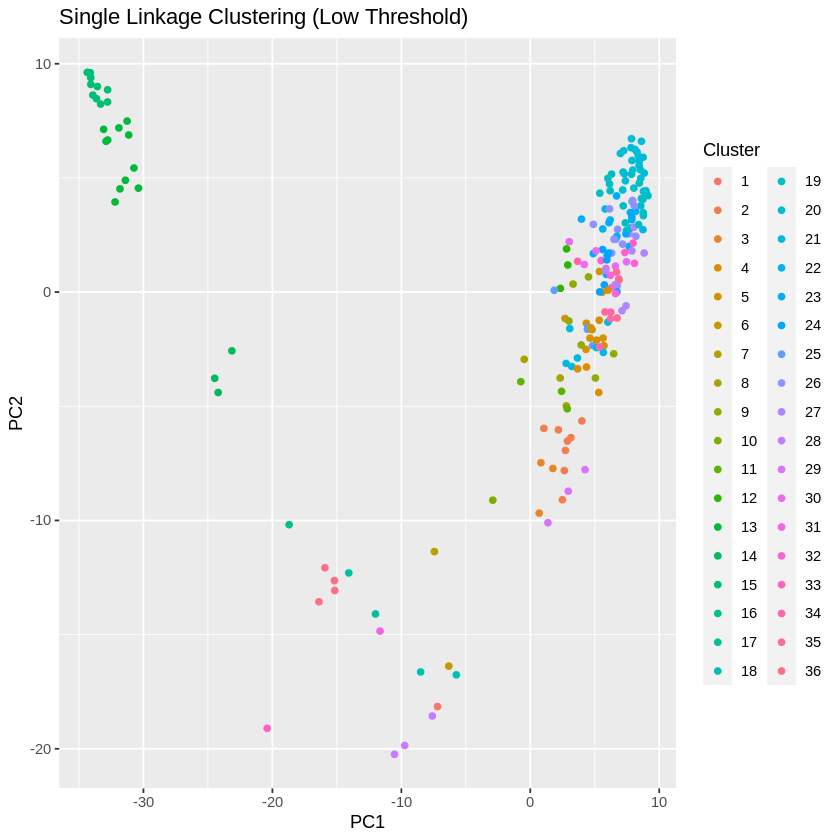

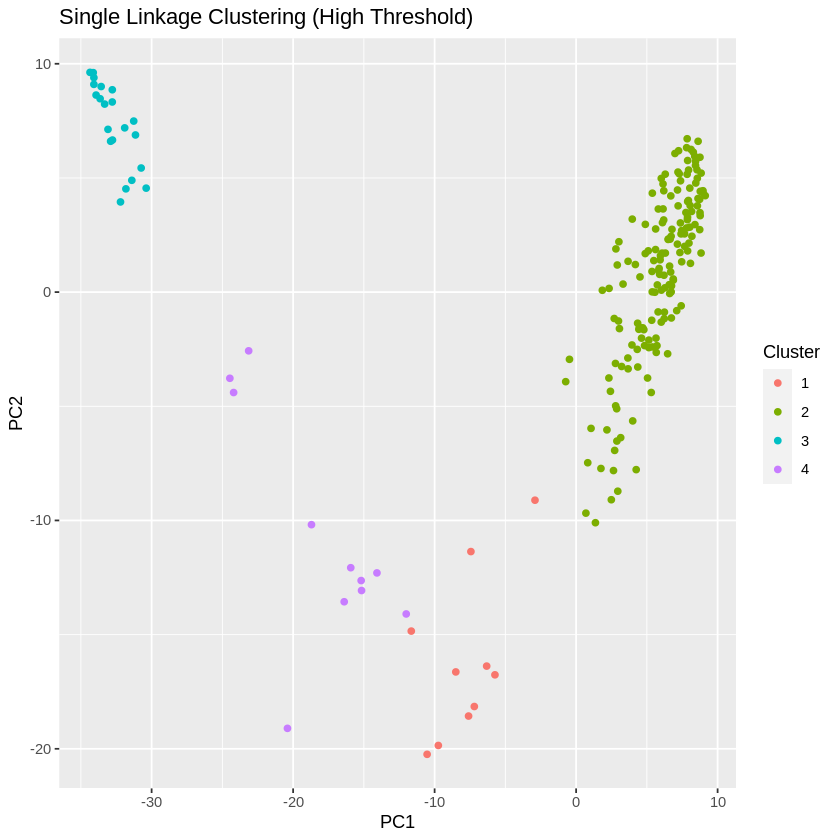

In [ ]:
single_linkage_clusters_low_factor <- as.factor(single_linkage_clusters_low)
single_linkage_clusters_high_factor <- as.factor(single_linkage_clusters_high)

ggplot(as.data.frame(top_3_pca), aes(x = PC1, y = PC2, color = single_linkage_clusters_low_factor)) + geom_point() +labs(title = "Single Linkage Clustering (Low Threshold)", color = "Cluster")
ggplot(as.data.frame(top_3_pca), aes(x = PC1, y = PC2, color = single_linkage_clusters_high_factor)) + geom_point() + labs(title = "Single Linkage Clustering (High Threshold)", color = "Cluster")

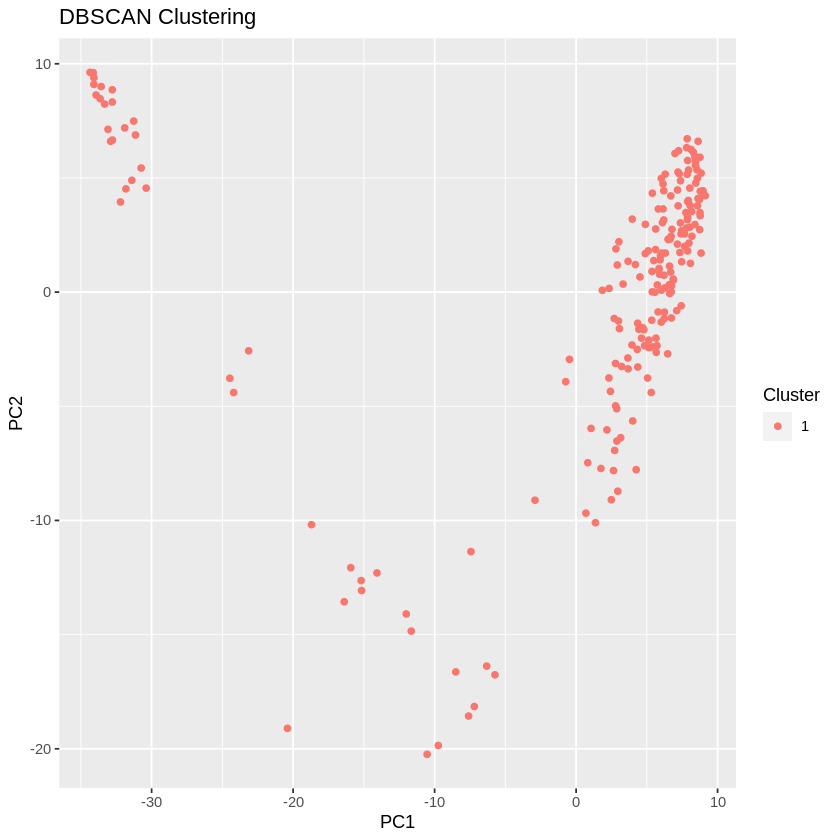

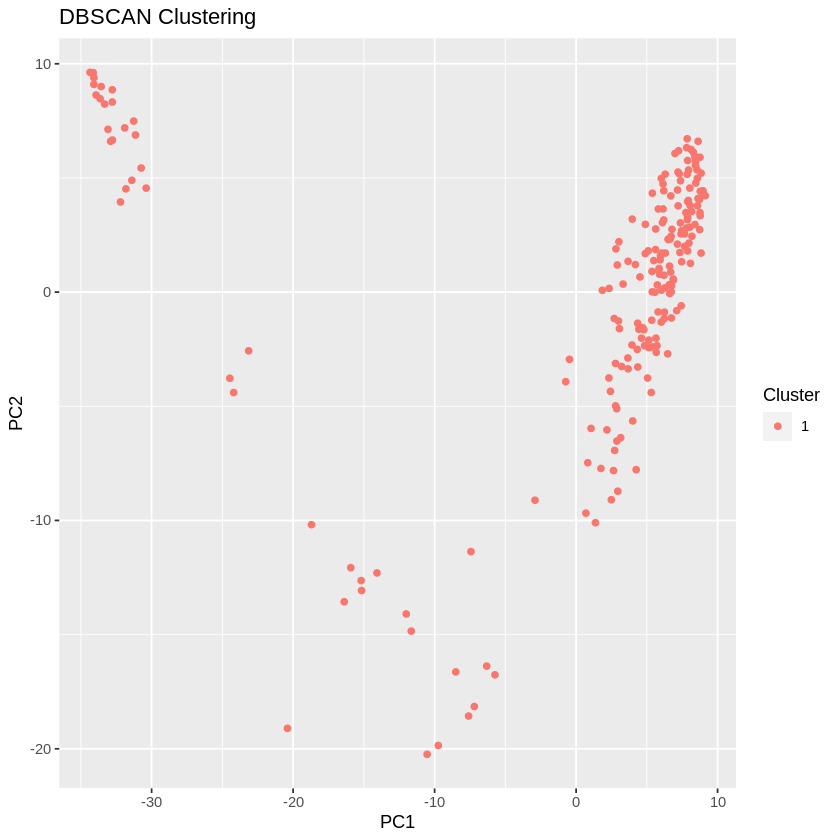

In [ ]:
dbscan_clusters1_factor <- as.factor(dbscan_clusters_1$cluster + 1)
dbscan_clusters2_factor <- as.factor(dbscan_clusters_2$cluster + 1)

ggplot(as.data.frame(top_3_pca), aes(x = PC1, y = PC2, color = dbscan_clusters1_factor)) +geom_point() +labs(title = "DBSCAN Clustering", color = "Cluster")
ggplot(as.data.frame(top_3_pca), aes(x = PC1, y = PC2, color = dbscan_clusters2_factor)) +geom_point() +labs(title = "DBSCAN Clustering", color = "Cluster")

### Task 5.3: Validity indices

Use Dunn, XB (Xie-Beni), and Silhouette Score for each cluster output (you should have at least 6 cluster outputs 2 for each method)

Which index matches with your expectation of the best cluster and worst?

In [ ]:
silhouette_score <- function(data, clusters) {
  silhouette <- silhouette(clusters, dist = dist(data))
  return (summary(silhouette)$avg.width)
}
dunn_index <- function(data, clusters) {
  clust_stats <- cluster.stats(dist(data), clusters)
  return(clust_stats$dunn)
}
xb_index <- function(data, clusters) {
  clust_stats<-cluster.stats(data, clusters)
  return(clust_stats$ch)
}

In [ ]:
silhouette_k3_means <- silhouette_score(top_3_pca, k_3_means_clusters$cluster)
dunn_k3_means <- dunn_index(top_3_pca, k_3_means_clusters$cluster)
xb_k3_means <- xb_index(top_3_pca, k_3_means_clusters$cluster)

silhouette_k4_means <- silhouette_score(top_3_pca, k_4_means_clusters$cluster)
dunn_k4_means <- dunn_index(top_3_pca, k_4_means_clusters$cluster)
xb_k4_means <- xb_index(top_3_pca, k_4_means_clusters$cluster)

silhouette_sl_low <- silhouette_score(top_3_pca, single_linkage_clusters_low)
dunn_sl_low <- dunn_index(top_3_pca, single_linkage_clusters_low)
xb_sl_low <- xb_index(top_3_pca, single_linkage_clusters_low)

silhouette_sl_high <- silhouette_score(top_3_pca, single_linkage_clusters_high)
dunn_sl_high <- dunn_index(top_3_pca, single_linkage_clusters_high)
xb_sl_high <- xb_index(top_3_pca, single_linkage_clusters_high)

# silhouette_dbscan1 <- silhouette_score(top_3_pca, dbscan_clusters_1$cluster)
# dunn_dbscan1 <- dunn_index(top_3_pca, dbscan_clusters_1$cluster)
# xb_dbscan1 <- xb_index(top_3_pca, dbscan_clusters_1$cluster)

# silhouette_dbscan2 <- silhouette_score(top_3_pca, dbscan_clusters_2$cluster)
# dunn_dbscan2 <- dunn_index(top_3_pca, dbscan_clusters_2$cluster)
# xb_dbscan2 <- xb_index(top_3_pca, dbscan_clusters_2$cluster)

Warning message in as.dist.default(d):
“non-square matrix”
Warning message in df[lower] <- x:
“number of items to replace is not a multiple of replacement length”
Warning message in df[lower] <- x:
“number of items to replace is not a multiple of replacement length”
Warning message in as.dist.default(d):
“non-square matrix”
Warning message in df[lower] <- x:
“number of items to replace is not a multiple of replacement length”
Warning message in df[lower] <- x:
“number of items to replace is not a multiple of replacement length”
Warning message in as.dist.default(d):
“non-square matrix”
Warning message in df[lower] <- x:
“number of items to replace is not a multiple of replacement length”
Warning message in df[lower] <- x:
“number of items to replace is not a multiple of replacement length”
Warning message in as.dist.default(d):
“non-square matrix”
Warning message in df[lower] <- x:
“number of items to replace is not a multiple of replacement length”
Warning message in df[lower] <- x:
“

In [ ]:
cat("K3-means - Silhouette:", silhouette_k3_means, "Dunn:", dunn_k3_means, "XB:", xb_k3_means, "\n")
cat("K4-means - Silhouette:", silhouette_k4_means, "Dunn:", dunn_k4_means, "XB:", xb_k4_means, "\n")
cat("SL Low - Silhouette:", silhouette_sl_low, "Dunn:", dunn_sl_low, "XB:", xb_sl_low, "\n")
cat("SL High - Silhouette:", silhouette_sl_high, "Dunn:", dunn_sl_high, "XB:", xb_sl_high, "\n")

K3-means - Silhouette: 0.6681916 Dunn: 0.2275911 XB: -98.75981 
K4-means - Silhouette: 0.4850545 Dunn: 0.04166684 XB: -65.54114 
SL Low - Silhouette: 0.2996123 Dunn: 0.1432237 XB: -4.728158 
SL High - Silhouette: 0.6519099 Dunn: 0.2489899 XB: -65.57006 


## Part 6: Classification Techniques

### Task 6.1: Classification using LDA and SVM

Classify samples into cancer and non-cancer groups based on PC1, PC2, and PC3 using LDA and SVM techniques


In [ ]:
data_lda <- data_for_regression
train_indices <- sample(1:nrow(data_lda), 0.7 * nrow(data_lda))
train_data <- data_lda[train_indices, ]
test_data <- data_lda[-train_indices, ]
lda_model <- lda(CancerExistence ~ PC1 + PC2 + PC3, data = train_data)
lda_pred <- predict(lda_model, newdata = test_data)$class
lda_accuracy <- sum(lda_pred == test_data$CancerExistence) / length(test_data$CancerExistence)
cat("LDA Accuracy:", lda_accuracy, "\n")

LDA Accuracy: 0.8064516 


In [ ]:
svm_model <- svm(CancerExistence ~ PC1 + PC2 + PC3, data = train_data)
svm_pred <- predict(svm_model, newdata = test_data)
svm_pred_class <- as.factor(ifelse(svm_pred > 0, 1, 0))
svm_accuracy <- sum(svm_pred_class == test_data$CancerExistence) / length(test_data$CancerExistence)
cat("SVM Accuracy:", svm_accuracy, "\n")

SVM Accuracy: 0.6129032 


### Task 6.2: metrics reporting for both method

Report overall accuracy, precision, recall, F score and plot confusion matrix for each method output

In [ ]:
calculate_metrics <- function(true_labels, predicted_labels) {
  confusion <- confusionMatrix(factor(predicted_labels), factor(true_labels))
  accuracy <- confusion$overall["Accuracy"]
  precision <- confusion$byClass["Pos Pred Value"]
  recall <- confusion$byClass["Sensitivity"]
  f_score <- confusion$byClass["F1"]
  return(list(accuracy = accuracy, precision = precision, recall = recall, f_score = f_score))
}

In [ ]:
lda_metrics <- calculate_metrics(test_data$CancerExistence, lda_pred)
cat("LDA Accuracy:", lda_metrics$accuracy, "\n")
cat("LDA Precision:", lda_metrics$precision, "\n")
cat("LDA Recall:", lda_metrics$recall, "\n")
cat("LDA F-score:", lda_metrics$f_score, "\n")

LDA Accuracy: 0.8064516 
LDA Precision: 0.75 
LDA Recall: 0.8571429 
LDA F-score: 0.8 


In [ ]:
svm_metrics <- calculate_metrics(test_data$CancerExistence, svm_pred_class)
cat("SVM Accuracy:", svm_metrics$accuracy, "\n")
cat("SVM Precision:", svm_metrics$precision, "\n")
cat("SVM Recall:", svm_metrics$recall, "\n")
cat("SVM F-score:", svm_metrics$f_score, "\n")

SVM Accuracy: 0.6129032 
SVM Precision: 1 
SVM Recall: 0.1428571 
SVM F-score: 0.25 


### Task 6.3: choice of best method based on metrics

- If you are asked to choose best classifier from your output metrics, what will you choose and
provide reason for you choice?
- In other contexts will your choice depend only on the method with the best accuracy why? And why not?

Hints: LDA implementation using the lda() function from the MASS package. SVM model creation using svm() from the e1071 package.
To calculate accuracy, you can use the caret package.

In [ ]:
# LDA is better. Most of the metrics are higher